# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

## Q1 Responses:

1. A model is linear due to the direct relationship between the coefficients, independent variables, and the resulting dependent variables. The linearity comes from being able to see a proportional change in one variable as a result of tweaking another elsewhere.

2. The coefficient for a dummy variable displays the difference in the dependent variable between the category of value and the category we're referncing.

3. Linear regression could be used for classiication, but more often than not it's not particularly useful. Regression is normally continuous, which contradicts the need for discrete values that are normally used in classification. Regression also assumes that there is a linear relationship between the variables in focus, while classification doesn't automatically assume that.

4. Some signs of overfitting are: A large bap between training and test performance, and a high R^2 on your training data.  

5. Multicollinearity takes place when 2 or more independent variables in a regression model are highly correlated. The effect of this is that this makes it difficult to determine the true individual effect of each variable on the dependent variable because their movements are too similar.

6. A way to incorporate nonlinear relationships bewteen the y and the x into my analyses is undertaking polynomial regression, due to its simplicity. Another way would be applying log and/or exponential functions to capute nonlinear effects, which is effective for power-law relationships.

7. The intercept represents the expected value of the y when all independent variables are zero. For the slope coefficient it is the expected change in y for a one-unit increase in x, holding all other variables constant. For a dummy variable it is how much y changes when the dummy variable is 1 instead of 0, keeping other variables constant.


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [30]:
## Q2.1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://raw.githubusercontent.com/ds4e/linearModels/refs/heads/main/data/Q1_clean.csv'


working_df = pd.read_csv(url)

working_df = working_df.rename(columns={'Neighbourhood ': 'Neighborhood'})

working_df.head()


# Grouping by neighborhood and computing mean price and score.
avg_prices_scores = working_df.groupby('Neighborhood')[['Price', 'Review Scores Rating']].mean().reset_index()

# Finding the most expensive neighborhood on average.
most_expensive_neighbourhood = avg_prices_scores.loc[avg_prices_scores['Price'].idxmax()]
print("Most Expensive Neighbourhood on Average:")
print(most_expensive_neighbourhood)


Most Expensive Neighbourhood on Average:
Neighborhood             Manhattan
Price                   183.664286
Review Scores Rating     91.801496
Name: 2, dtype: object


In [33]:
## Q2.2

import statsmodels.api as sm

# One-hot encoding here on Neighborhood without dropping a reference category.
neighborhood_dummies = pd.get_dummies(working_df['Neighborhood'], drop_first=False)

# Combining the dummy variables with the dataframe here.
X = neighborhood_dummies
y = working_df['Price']

# Fitting an OLS regression model without an intercept.
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        17:15:05   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

In [35]:
## Q2.3

import pandas as pd
import statsmodels.api as sm

# One-hot encoding Neighborhood, but dropping the first category to avoid multicollinearity.
neighborhood_dummies = pd.get_dummies(working_df['Neighborhood'], drop_first=True)

# Defining the independent and dependent variables here
# Ensure all columns in neighborhood_dummies are numeric
neighborhood_dummies = neighborhood_dummies.astype(float)

X = sm.add_constant(neighborhood_dummies)  # Here we're adding intercept
y = working_df['Price']

# Fit an OLS regression model with an intercept
model_with_intercept = sm.OLS(y, X).fit()

# Show the regression results
print(model_with_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Tue, 25 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        17:18:00   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628

In [40]:
## Q2.4

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Selecting features and target variable
X = working_df[['Review Scores Rating', 'Neighborhood']]
y = working_df['Price']


X = pd.get_dummies(X, drop_first=True)  # Dropping first category to avoid multicollinearity.

# Split into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_test_pred = model.predict(X_test)

# Compute R^2 and RMSE
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)  # RMSE

print(f"R² on Test Set: {r2_test:.4f}")
print(f"RMSE on Test Set: {rmse_test:.4f}")


# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Find the most expensive property type
expensive_property = working_df.groupby('Property Type')['Price'].mean().idxmax()
highest_price = working_df.groupby('Property Type')['Price'].mean().max()

print(f"The most expensive property type on average is: {expensive_property} with an average price of ${highest_price:.2f}.")




R² on Test Set: 0.0459
RMSE on Test Set: 19857.9422
                      Feature  Coefficient
0        Review Scores Rating     1.211852
1       Neighborhood_Brooklyn    51.555970
2      Neighborhood_Manhattan   107.413553
3         Neighborhood_Queens    20.198573
4  Neighborhood_Staten Island    23.454672
The most expensive property type on average is: Condominium with an average price of $241.23.


In [43]:
## Q2.5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select features and target variable
X = working_df[['Review Scores Rating', 'Neighborhood', 'Property Type']]
y = working_df['Price']

# One-hot encode Neighborhood and Property Type
X = pd.get_dummies(X, drop_first=True)  # Drop first category to avoid multicollinearity

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute R^2 and RMSE
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)  # RMSE

print(f"R² on Test Set: {r2_test:.4f}")
print(f"RMSE on Test Set: {rmse_test:.4f}")

# Get coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Find the most expensive property type
expensive_property = working_df.groupby('Property Type')['Price'].mean().idxmax()
highest_price = working_df.groupby('Property Type')['Price'].mean().max()

print(f"The most expensive property type on average is: {expensive_property} with an average price of ${highest_price:.2f}.")

R² on Test Set: 0.0542
RMSE on Test Set: 19684.8371
                          Feature  Coefficient
0            Review Scores Rating     1.201011
1           Neighborhood_Brooklyn    59.633702
2          Neighborhood_Manhattan   121.005520
3             Neighborhood_Queens    26.830617
4      Neighborhood_Staten Island    15.700974
5   Property Type_Bed & Breakfast   -28.703920
6              Property Type_Boat    47.070419
7          Property Type_Bungalow    83.972440
8             Property Type_Cabin    12.389621
9         Property Type_Camper/RV   -13.817125
10           Property Type_Castle   -41.810548
11           Property Type_Chalet   -30.237720
12      Property Type_Condominium    61.907162
13             Property Type_Dorm   -42.277758
14            Property Type_House    34.711346
15              Property Type_Hut  -134.604484
16       Property Type_Lighthouse   -91.438731
17             Property Type_Loft    69.891025
18            Property Type_Other    49.249761
19      

## Q2.6

In part 4, the coefficient would be larger b/c it doesn't account for the impact of Neighborhood & Property Type. It assumes that the price change is due purely to the Review Scores Rating and doesn’t “correct” for differences across Neighbourhoods or Property Types. In part 5, the coefficient for Review Scores Rating will probably decrease b/c the model now accounts for the additional factors (like Neighbourhood & Property Type) that also influence Price. The effect of Review Scores Rating on Price is now “corrected” for these factors, so the coefficient will represent a more precise measure of how much Price is expected to change due to Review Scores Rating, after adjusting for the other factors.


**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q3.1

# The original URL was incorrect. It should be:
url = 'https://raw.githubusercontent.com/ds4e/linearModels/main/data/cars_hw.csv'


clean_df = pd.read_csv(url)

# removing the 'st, nd' from the number of owners so the data reads better.
clean_df['No_of_Owners'] = clean_df['No_of_Owners'].str[:-2]

clean_df.head()



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000


               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

<ipython-input-6-a4d467867edd>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Make')


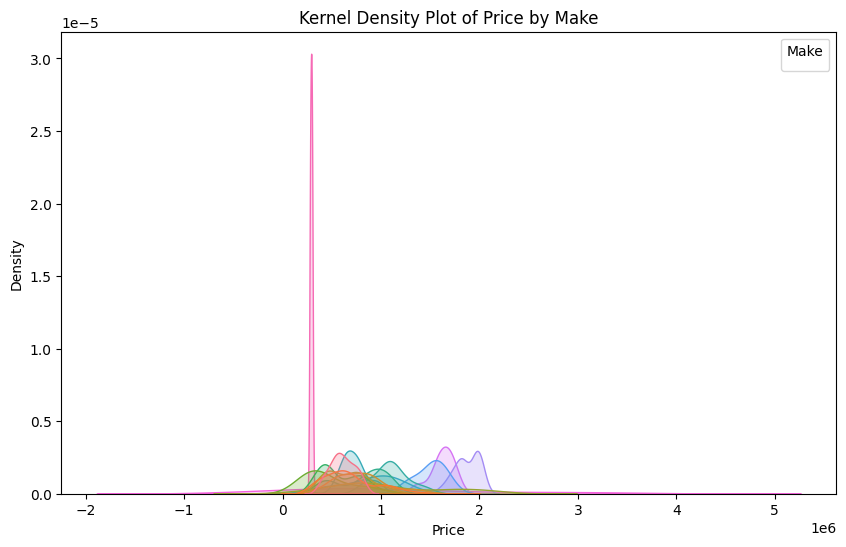

In [6]:
## Q3.2

price_summary = clean_df.groupby('Make')['Price'].describe()
print(price_summary)

# Create a grouped kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=clean_df, x='Price', hue='Make', fill=True, common_norm=False)
plt.title('Kernel Density Plot of Price by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Make')
plt.show()

In [7]:
## Q3.3

from sklearn.model_selection import train_test_split


X = clean_df.drop('Price', axis=1)
y = clean_df['Price']  # Target variable (Price)

# Splitting the data into 80% training and 20% testing sets here,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# we can check the shape of the resulting sets with this.
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (780, 11), Testing set size: (196, 11)


In [8]:
## Q3.4

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np


# Splitting into numeric and categorical columns here.
numeric_cols = clean_df.select_dtypes(include='number').columns.tolist()
categorical_cols = clean_df.select_dtypes(exclude='number').columns.tolist()

# Separating target and features...
X = clean_df[numeric_cols + categorical_cols]  # All features (numeric + categorical)
y = clean_df['Price']  # Target variable here!

# Splitting data into 80% training and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

all_categorical_features = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
all_dummies = pd.get_dummies(all_categorical_features, drop_first=True)

# Ensure consistent columns in both training and test sets
X_train_dummies = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_dummies = pd.get_dummies(X_test[categorical_cols], drop_first=True)


X_train_dummies = X_train_dummies.reindex(columns=all_dummies.columns, fill_value=0)
X_test_dummies = X_test_dummies.reindex(columns=all_dummies.columns, fill_value=0)

# I want to make sure the same dummy variables are in both train and test sets (done to avoid mismatches!)
X_train = pd.concat([X_train[numeric_cols], X_train_dummies], axis=1)
X_test = pd.concat([X_test[numeric_cols], X_test_dummies], axis=1)

# Standardize numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


## this is traning the model on the numeric values only..
model_numeric = LinearRegression()
model_numeric.fit(X_train[numeric_cols], y_train)

# Predictions
y_train_pred_numeric = model_numeric.predict(X_train[numeric_cols])
y_test_pred_numeric = model_numeric.predict(X_test[numeric_cols])

# Calculate R^2 and RMSE
r2_train_numeric = r2_score(y_train, y_train_pred_numeric)
r2_test_numeric = r2_score(y_test, y_test_pred_numeric)

# Calculate RMSE using NumPy's sqrt function
rmse_train_numeric = np.sqrt(mean_squared_error(y_train, y_train_pred_numeric))
rmse_test_numeric = np.sqrt(mean_squared_error(y_test, y_test_pred_numeric))

print(f"Model 1 (Numeric only) - R² (Train): {r2_train_numeric:.4f}, RMSE (Train): {rmse_train_numeric:.4f}")
print(f"Model 1 (Numeric only) - R² (Test): {r2_test_numeric:.4f}, RMSE (Test): {rmse_test_numeric:.4f}")


## Training model on categorical features onyl here.
model_categorical = LinearRegression()
model_categorical.fit(X_train_dummies, y_train)

# Predictions
y_train_pred_categorical = model_categorical.predict(X_train_dummies)
y_test_pred_categorical = model_categorical.predict(X_test_dummies)

# Calculate R^2 and RMSE
r2_train_categorical = r2_score(y_train, y_train_pred_categorical)
r2_test_categorical = r2_score(y_test, y_test_pred_categorical)

rmse_train_categorical = mean_squared_error(y_train, y_train_pred_categorical)
rmse_test_categorical = mean_squared_error(y_test, y_test_pred_categorical)

print(f"Model 2 (Categorical only) - R² (Train): {r2_train_categorical:.4f}, RMSE (Train): {rmse_train_categorical:.4f}")
print(f"Model 2 (Categorical only) - R² (Test): {r2_test_categorical:.4f}, RMSE (Test): {rmse_test_categorical:.4f}")



## Here we are training the model on both numeric and one-hot encoded categorical features.
model_combined = LinearRegression()
model_combined.fit(X_train, y_train)

# Predictions
y_train_pred_combined = model_combined.predict(X_train)
y_test_pred_combined = model_combined.predict(X_test)

# Calculate R^2 and RMSE
r2_train_combined = r2_score(y_train, y_train_pred_combined)
r2_test_combined = r2_score(y_test, y_test_pred_combined)

rmse_train_combined = mean_squared_error(y_train, y_train_pred_combined)
rmse_test_combined = mean_squared_error(y_test, y_test_pred_combined)

print(f"Model 3 (Combined) - R² (Train): {r2_train_combined:.4f}, RMSE (Train): {rmse_train_combined:.4f}")
print(f"Model 3 (Combined) - R² (Test): {r2_test_combined:.4f}, RMSE (Test): {rmse_test_combined:.4f}")


Model 1 (Numeric only) - R² (Train): 1.0000, RMSE (Train): 0.0000
Model 1 (Numeric only) - R² (Test): 1.0000, RMSE (Test): 0.0000
Model 2 (Categorical only) - R² (Train): 0.7736, RMSE (Train): 31599796344.5724
Model 2 (Categorical only) - R² (Test): 0.7087, RMSE (Test): 33412588437.4869
Model 3 (Combined) - R² (Train): 1.0000, RMSE (Train): 0.0000
Model 3 (Combined) - R² (Test): 1.0000, RMSE (Test): 0.0000


In [9]:
## Q3.5

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

# Applying polynomial expansion to the numeric features.
X_train_poly = poly.fit_transform(X_train[numeric_cols])
X_test_poly = poly.transform(X_test[numeric_cols])

# Converting the expanded features into a DataFrame for visualization and modeling here.
poly_columns = poly.get_feature_names_out(input_features=numeric_cols)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_columns)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_columns)

# Combine the polynomial features with the categorical features (one-hot encoded) here.
X_train_combined = pd.concat([X_train_poly_df, X_train_dummies], axis=1)
X_test_combined = pd.concat([X_test_poly_df, X_test_dummies], axis=1)

# Standardize the polynomial features (optional but recommended for regression) here.
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_poly_scaled = scaler.fit_transform(X_train_poly_df)
X_train_combined = pd.concat([pd.DataFrame(X_train_poly_scaled, columns=poly_columns), X_train_dummies], axis=1)

# Transform the test data using the fitted scaler
X_test_poly_scaled = scaler.transform(X_test_poly_df)
X_test_combined = pd.concat([pd.DataFrame(X_test_poly_scaled, columns=poly_columns), X_test_dummies], axis=1)

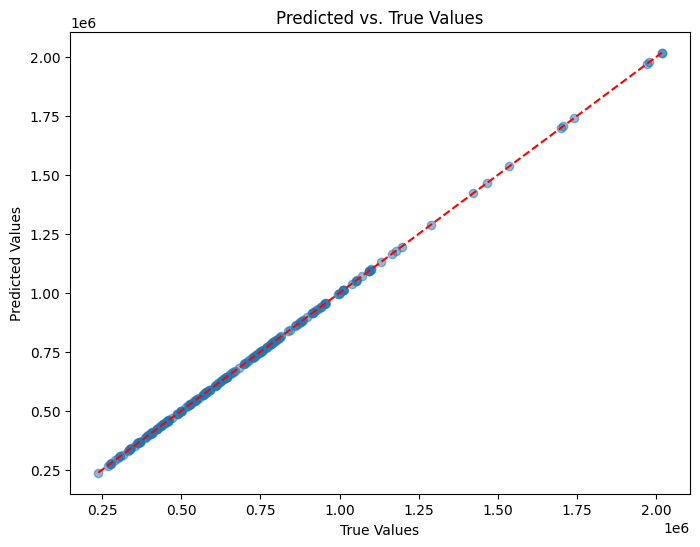

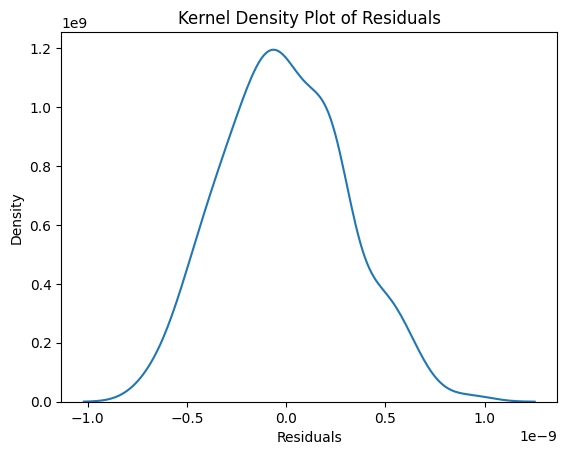

In [10]:
## Q3.6

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

url = 'https://raw.githubusercontent.com/ds4e/linearModels/main/data/cars_hw.csv'
clean_df = pd.read_csv(url)


clean_df['No_of_Owners'] = clean_df['No_of_Owners'].str[:-2]
numeric_cols = clean_df.select_dtypes(include='number').columns.tolist()
categorical_cols = clean_df.select_dtypes(exclude='number').columns.tolist()
X = clean_df[numeric_cols + categorical_cols]  # All features (numeric + categorical)
y = clean_df['Price']  # Target variable here!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
all_categorical_features = pd.concat([X_train[categorical_cols], X_test[categorical_cols]])
all_dummies = pd.get_dummies(all_categorical_features, drop_first=True)
X_train_dummies = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_dummies = pd.get_dummies(X_test[categorical_cols], drop_first=True)
X_train_dummies = X_train_dummies.reindex(columns=all_dummies.columns, fill_value=0)
X_test_dummies = X_test_dummies.reindex(columns=all_dummies.columns, fill_value=0)
X_train = pd.concat([X_train[numeric_cols], X_train_dummies], axis=1)
X_test = pd.concat([X_test[numeric_cols], X_test_dummies], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
model_combined = LinearRegression()
model_combined.fit(X_train, y_train)

y_pred = model_combined.predict(X_test)

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values")
plt.show()

sns.kdeplot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()


**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result.

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure.

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm.

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
